In [287]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

# A. Exploratory Data Analysis

## Step 1: Data Overview

This step will show the number of entries, column names, data types, and missing values

In [288]:
# read your data

df = pd.read_csv('Data/diabetes.csv')
df.head()

,num_pregnant,glucose_concentration,blood_pressure,triceps_thickness,two_hour_insulin,bmi,pedigree_function,age,is_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_pregnant           768 non-null    int64  
 1   glucose_concentration  768 non-null    int64  
 2   blood_pressure         768 non-null    int64  
 3   triceps_thickness      768 non-null    int64  
 4   two_hour_insulin       768 non-null    int64  
 5   bmi                    768 non-null    float64
 6   pedigree_function      768 non-null    float64
 7   age                    768 non-null    int64  
 8   is_diabetes            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [290]:
features = df.drop(['is_diabetes'], axis=1).columns

### Insight

Here are the insight found from step 1:
- Number of Column : 9
- Number of Entries : 786 
- Number of Missing Values : 0
- Name of Column:
    - `num_pregnant`            : the number of pregnancies the individual has had         
    - `glucose_concentration`   : the concentration of glucose in the individual's blood
    - `blood_pressure`          : the individual's blood pressure reading 
    - `triceps_thickness`       : the thickness of the individual's triceps skinfold, a measure of body fat
    - `two_hour_insulin`        : Insulin level in the individual's blood measured after 2 hours glucose test
    - `bmi`                     : the individual's Body Mass Index, measure of body fat based on height and weight
    - `pedigree_function`       : likelihood of the individual having diabetes based in familiy history
    - `age`                     : the individual's age
    - `is_diabetes`             : the target varibale, 1 indicating that the individual has diabetes, 0 otherwise. 


## Step 2: Summary Statistics


In [291]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
two_hour_insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree_function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
is_diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Insight

- `two_hour_insulin` feature has highest standard deviasion and this indicate that this feature has high variability or dispersion due to data points are widely spread out from the mean.
- `pedigree_function` feature has the lowest standard deviasion and this indicate that this feature has low variability or consistency in the data
- Feature such as `glucose_concentration`, `blood_pressure`, `triceps_thickness`, `two_hour_insulin`, `bmi` **cannot have** a value of **0**, this lead to replacing the 0 value in next preprocessing step 

## Step 3: Distribution Analysis

### 3.1 Univariate Analysis

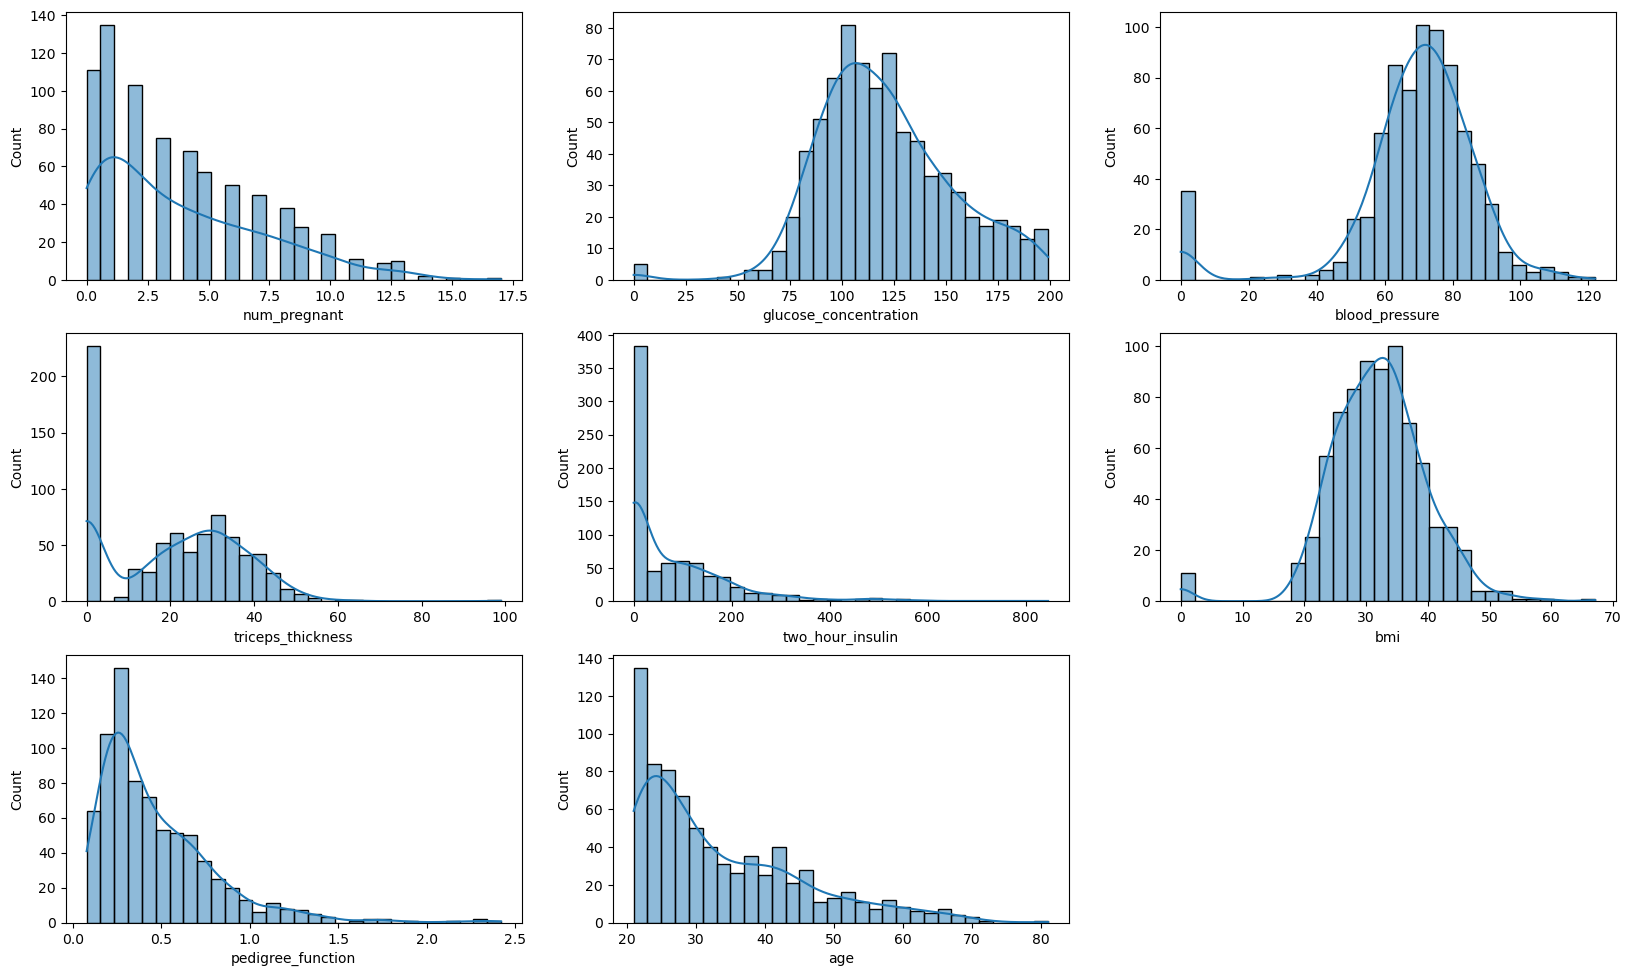

In [292]:
plt.figure(figsize=(20,16))
for i in range(0, len(features)):
    plt.subplot(4,3,i+1)
    #sns.violinplot(data=df,  y=df[features[i]], linewidth=1)
    sns.histplot(df[features[i]], kde=True, bins=30)
    

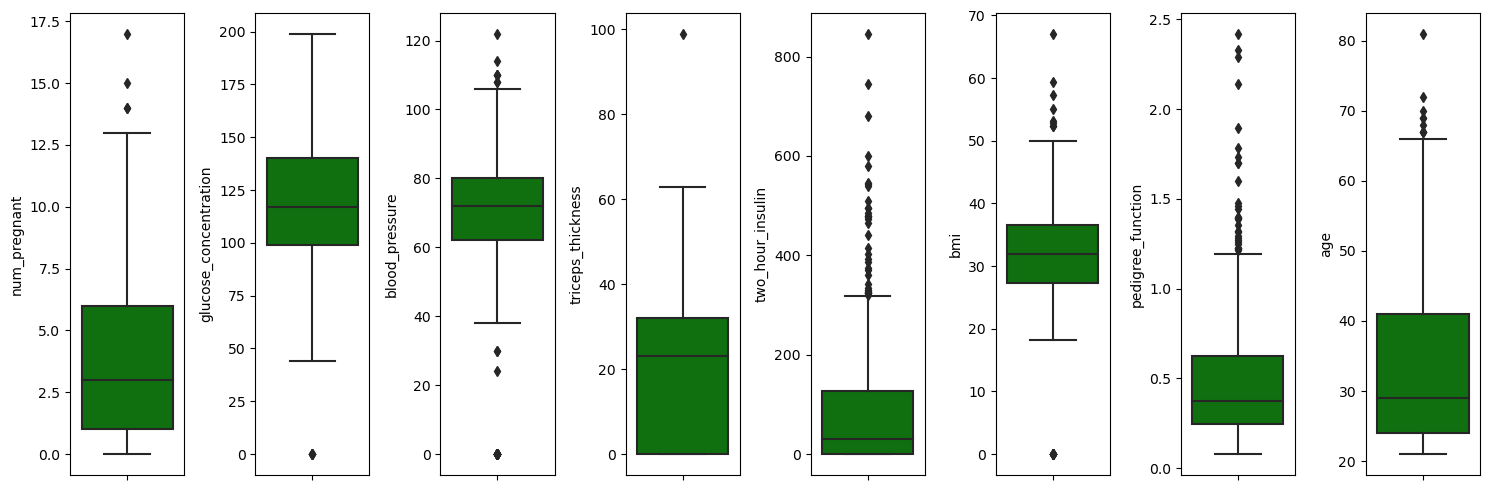

In [293]:
plt.figure(figsize=(15, 5))
for i in range(0, len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout()

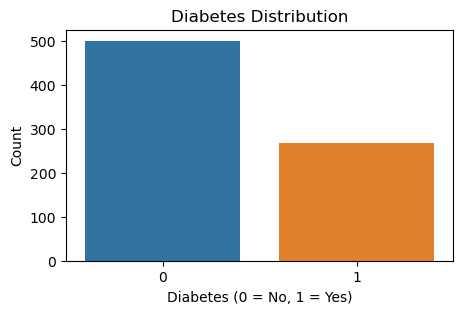

In [294]:
plt.figure(figsize=(5, 3))
sns.countplot(x='is_diabetes', data=df)
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### 3.2 Bivariate Analysis

In bivariate analysis we try to find the correlation between the features and target

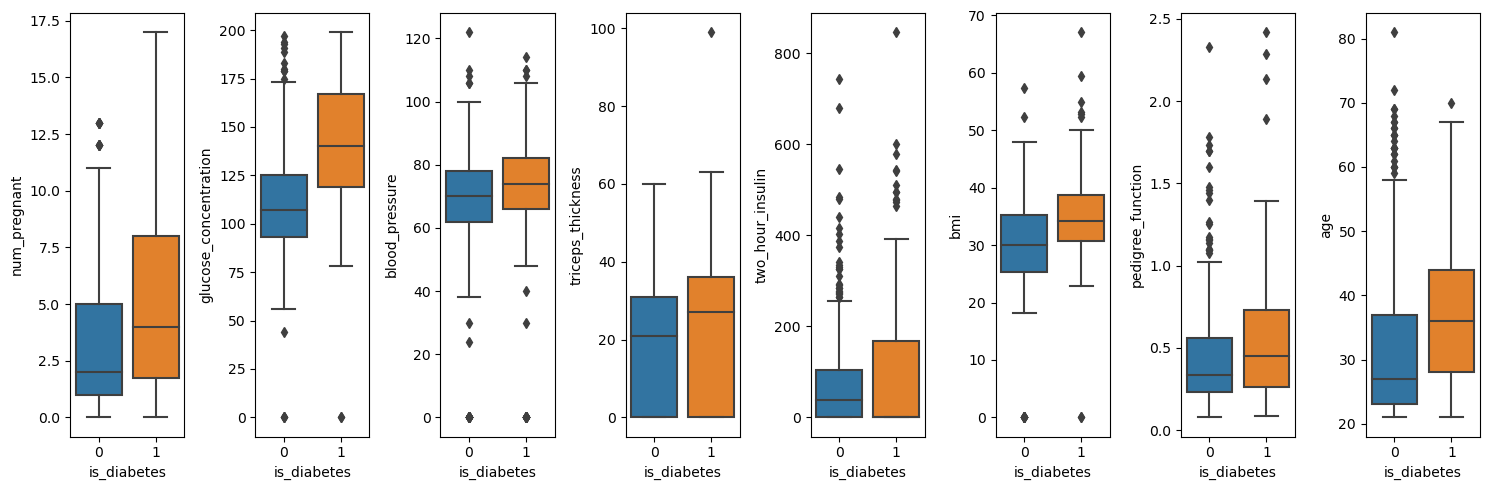

In [295]:
plt.figure(figsize=(15, 5))
for i in range(0, len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(x='is_diabetes', y=df[features[i]], data=df)
    plt.tight_layout()

### 3.3 Multivariate Analysis

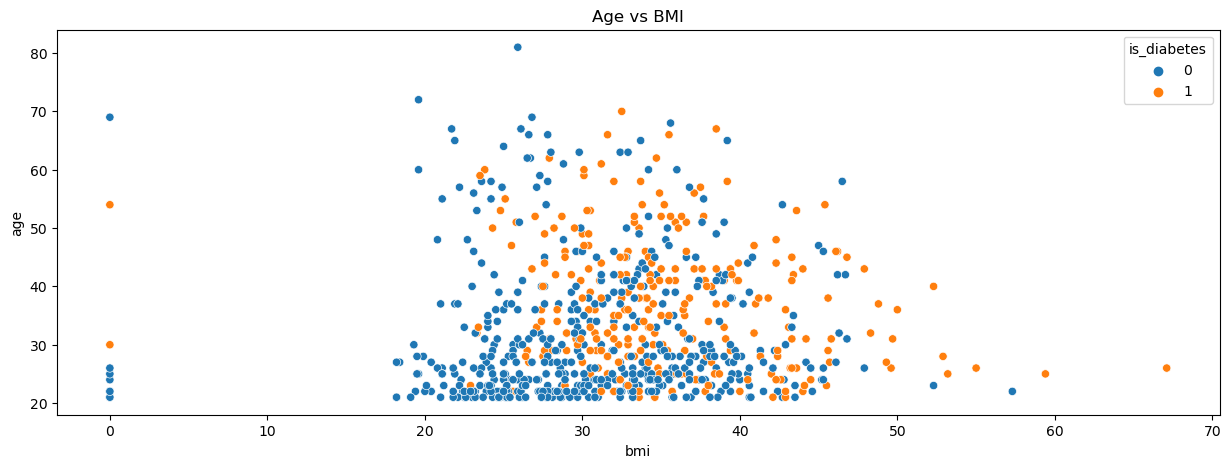

In [296]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='bmi', y='age', hue='is_diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

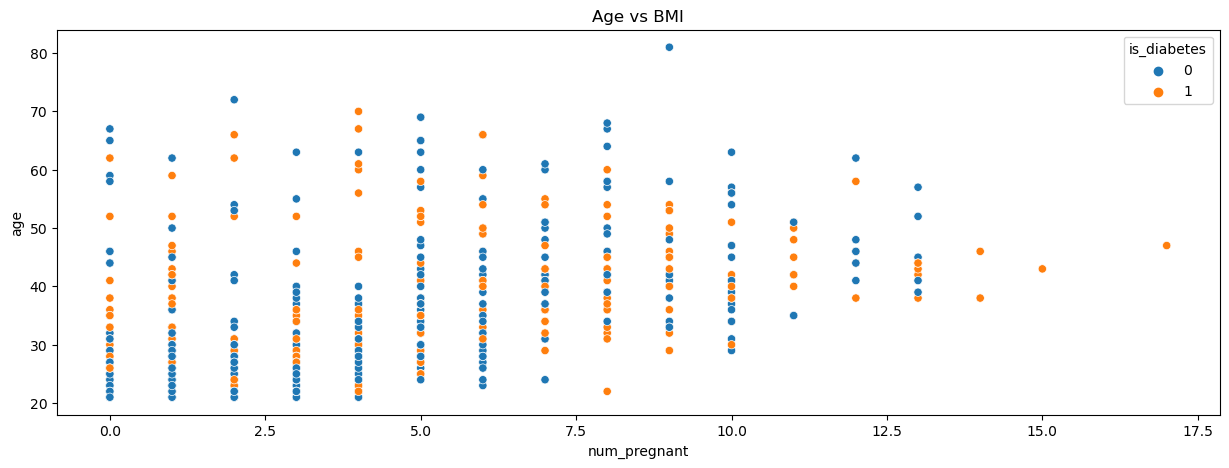

In [297]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='num_pregnant', y='age', hue='is_diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

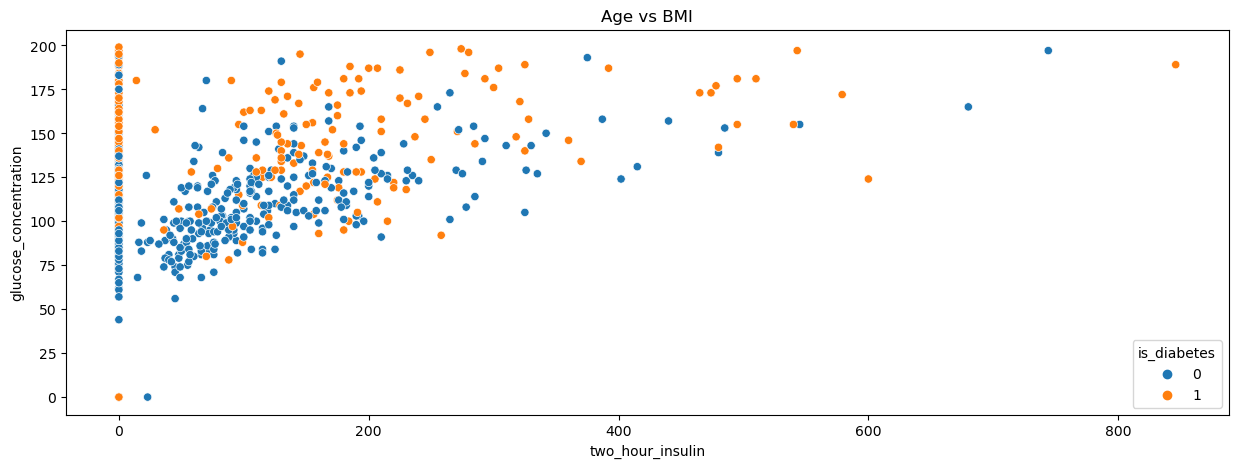

In [298]:
plt.figure(figsize=(15, 5))
sns.scatterplot(y='glucose_concentration', x='two_hour_insulin', hue='is_diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

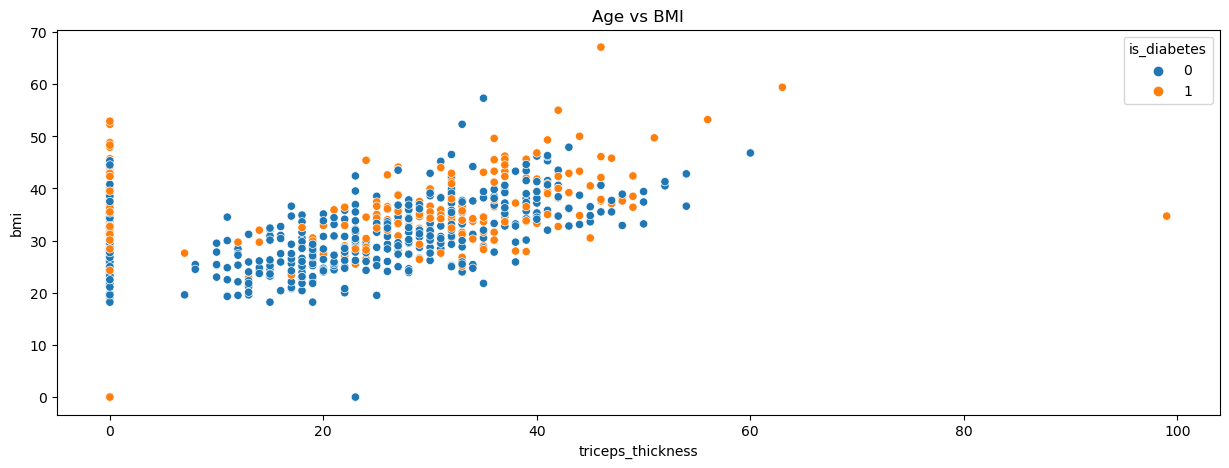

In [299]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='triceps_thickness', y='bmi', hue='is_diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

### Insight

## Step 4: Correlation Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

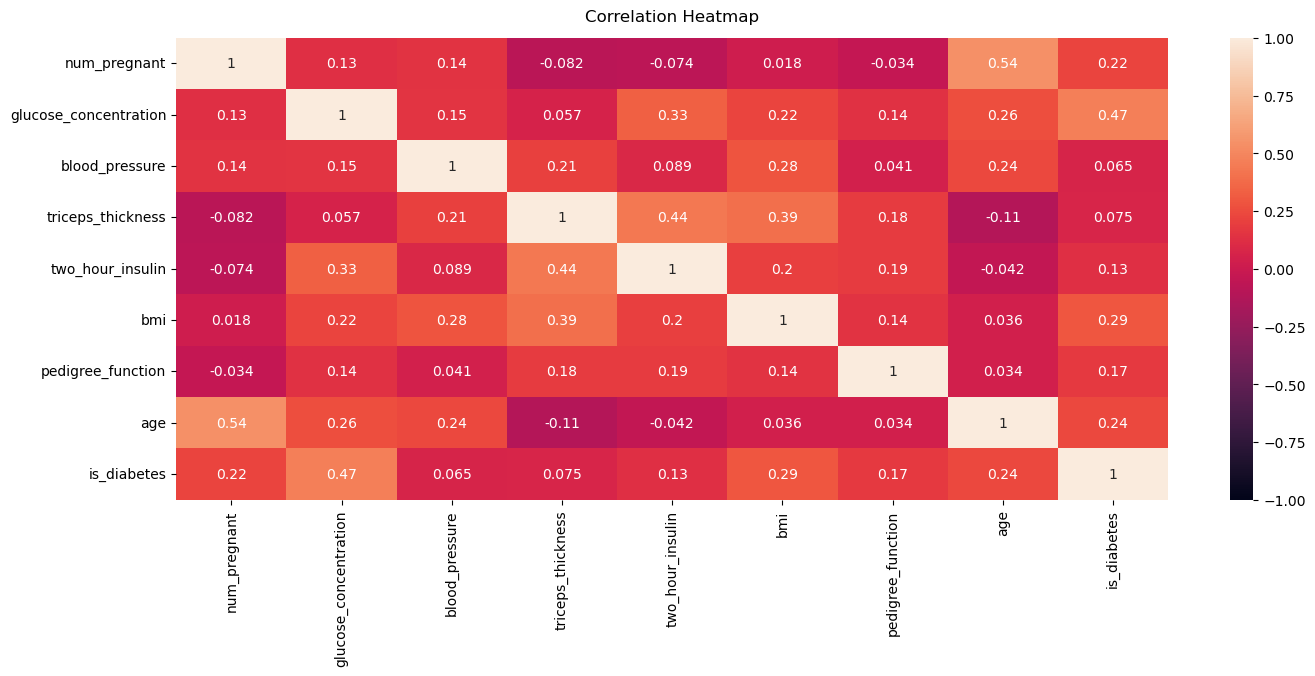

In [300]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Insight

# B. Data Preprocessing

## 1. Replace Zero with `Nan`

In [301]:
columns_with_zeros = ['glucose_concentration', 'blood_pressure', 'triceps_thickness', 'two_hour_insulin', 'bmi']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

## 2. Handling Missing Values

In [302]:
imputer = SimpleImputer(strategy='median')
df[columns_with_zeros] = imputer.fit_transform(df[columns_with_zeros])

## 3. Handling Duplicates

In [303]:
#check duplicate
df.duplicated().sum()

0

## 4. Handling Outliers

In [304]:
for num in features:
    df[num] = np.log(df[num] + (df[df[num] > 0][num].min() / 2))

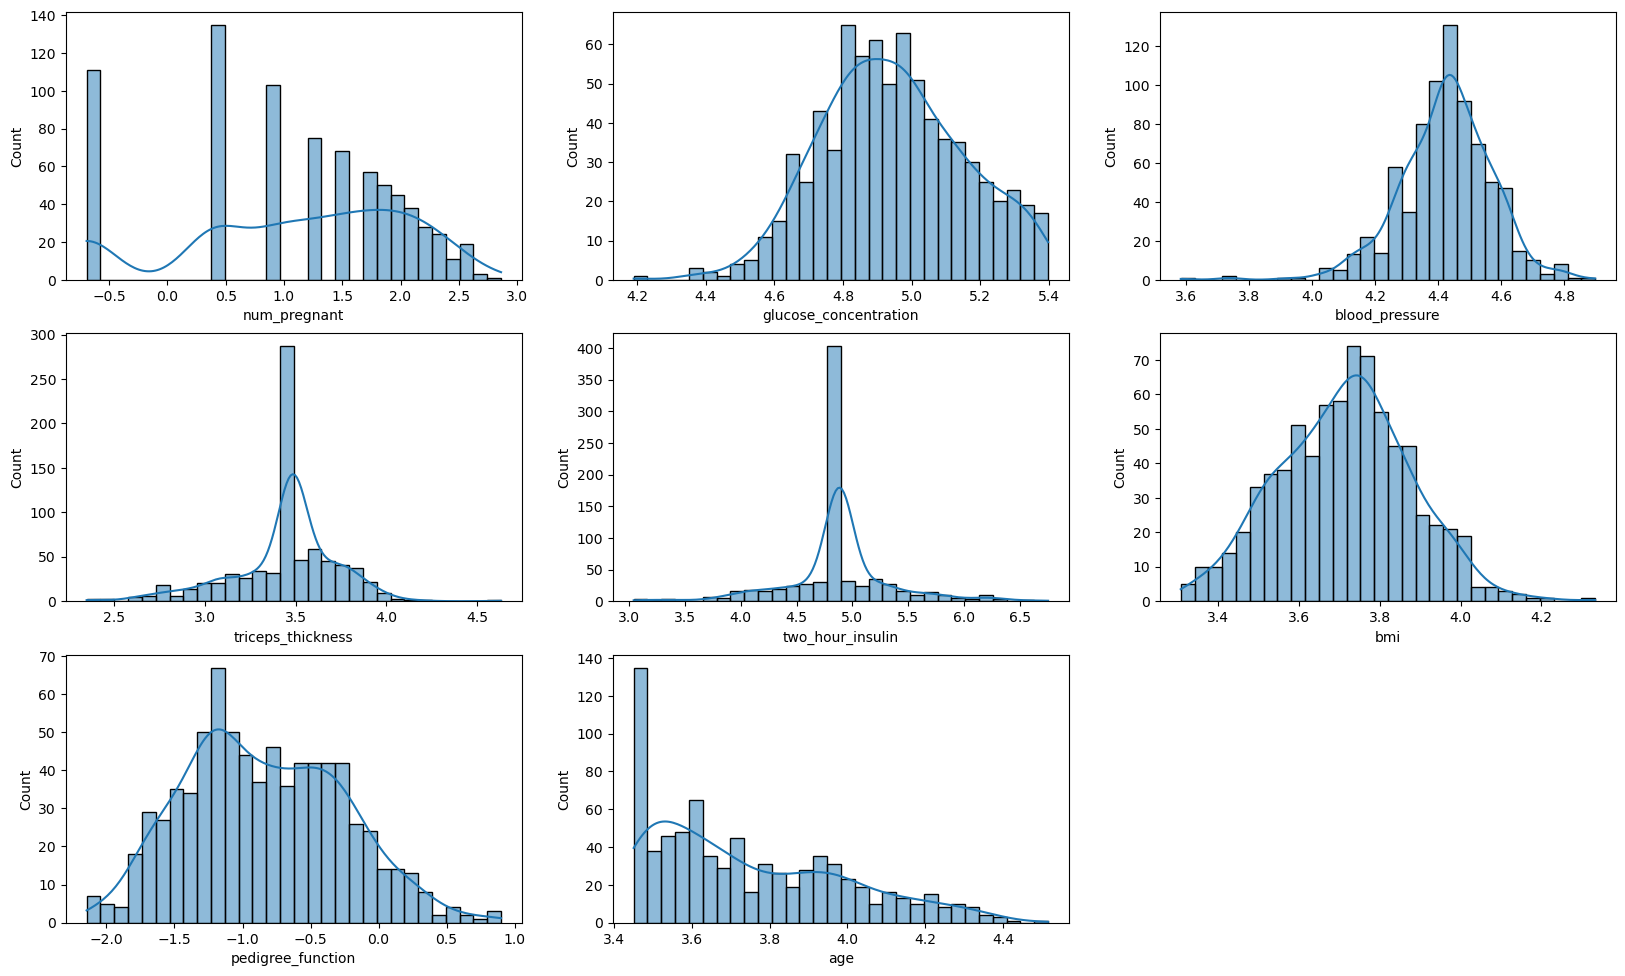

In [305]:
plt.figure(figsize=(20,16))
for i in range(0, len(features)):
    plt.subplot(4,3,i+1)
    #sns.violinplot(data=df,  y=df[features[i]], linewidth=1)
    sns.histplot(df[features[i]], kde=True, bins=30)
    

In [306]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in features:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 768
Jumlah baris setelah memfilter outlier: 738


## 5. Feature Scaling

In [307]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [308]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_pregnant,738.0,6.438692e-17,1.000678,-1.857059,-0.719957,0.157027,0.797755,1.822853
glucose_concentration,738.0,3.630189e-15,1.000678,-2.861748,-0.686734,-0.052418,0.692125,2.202226
blood_pressure,738.0,1.511137e-16,1.000678,-2.946297,-0.716833,0.013835,0.677982,2.973966
triceps_thickness,738.0,-9.561006e-16,1.000678,-3.143969,-0.365139,0.123289,0.451642,2.614221
two_hour_insulin,738.0,-2.711481e-16,1.000678,-3.211114,0.003437,0.003437,0.003437,3.381174
bmi,738.0,-1.809716e-15,1.000678,-2.557769,-0.693226,0.066127,0.675018,3.043043
pedigree_function,738.0,1.961695e-16,1.000678,-2.246127,-0.736272,-0.084239,0.770959,2.848162
age,738.0,-1.050349e-15,1.000678,-1.207343,-0.835462,-0.282204,0.802232,2.728506
is_diabetes,738.0,3.482385e-01,0.476735,0.000000,0.000000,0.000000,1.000000,1.000000


## 6. Handling Imbalance Class

In [309]:
X = df.drop(['is_diabetes'],axis=1)
y = df["is_diabetes"]
y.value_counts()

0    481
1    257
Name: is_diabetes, dtype: int64

In [310]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_balanced, y_balanced = smote.fit_resample(X, y)
y.value_counts()

0    481
1    257
Name: is_diabetes, dtype: int64

## 7. Train-test Split

The dataset is split into 80% training data and 20% testing data. Stratifying ensures the target variable (`is_diabetes`) has the same distribution in both sets

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#for balanced class 
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [312]:
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (590, 8)
Testing Features Shape: (148, 8)
Training Target Shape: (590,)
Testing Target Shape: (148,)


# C. Modeling

The target indicates the prediction of whether a persin has diabetes or not based on the features, this kind of prediction is a binary classification problem where the target variable (is_diabetes) is either 0 (no diabetes) or 1 (diabetes). Here are some models that may suit with this kind of classification:
- Logistic Regression
- Decision Tree
- Random Fores
- SVM
- KNN
- Neural Network

# C. Modeling Imbalanced Class

## Define Model Algorithm

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [314]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Desision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Neural Network' : MLPClassifier()
}

## Train and Evaluate Models - Imbalanced Target

In [315]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [316]:
results_on_train_set_imbalanced = {}
for model_name, model in models.items():

    # Make predictions
    y_pred = model.predict(X_train)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    conf_matrix = confusion_matrix(y_train, y_pred)
    
    # Store results
    results_on_train_set_imbalanced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Confusion Matrix

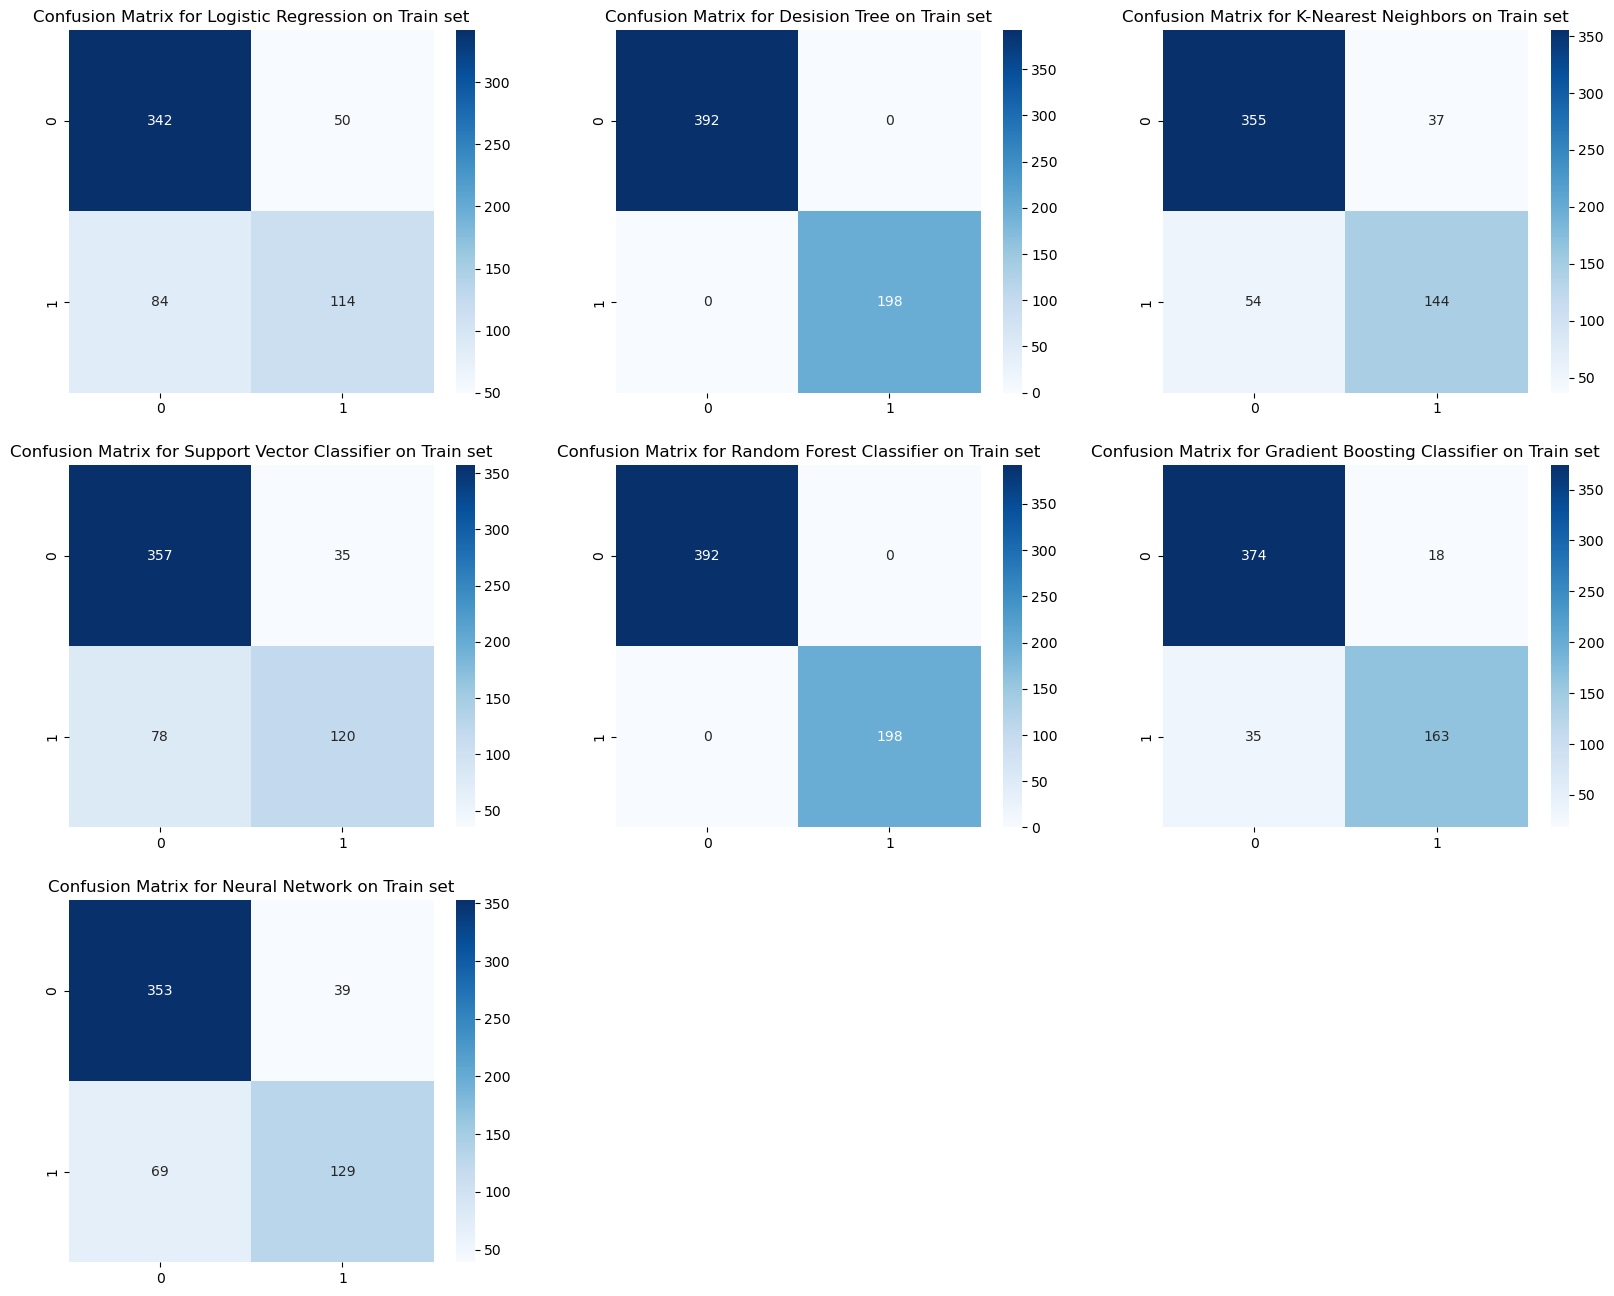

In [317]:
plt.figure(figsize=(20,16))
i=0
for model_name, metrics in results_on_train_set_imbalanced.items():
    plt.subplot(3,3,i+1)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} on Train set')
    i+=1

In [318]:
class_info_train = pd.DataFrame(results_on_train_set_imbalanced)
class_info_train = class_info_train.drop('Confusion Matrix')

In [319]:
class_info_train.T

,Accuracy,Precision,Recall
Logistic Regression,0.772881,0.695122,0.575758
Desision Tree,1.0,1.0,1.0
K-Nearest Neighbors,0.845763,0.79558,0.727273
Support Vector Classifier,0.808475,0.774194,0.606061
Random Forest Classifier,1.0,1.0,1.0
Gradient Boosting Classifier,0.910169,0.900552,0.823232
Neural Network,0.816949,0.767857,0.651515


### ROC_AUC

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


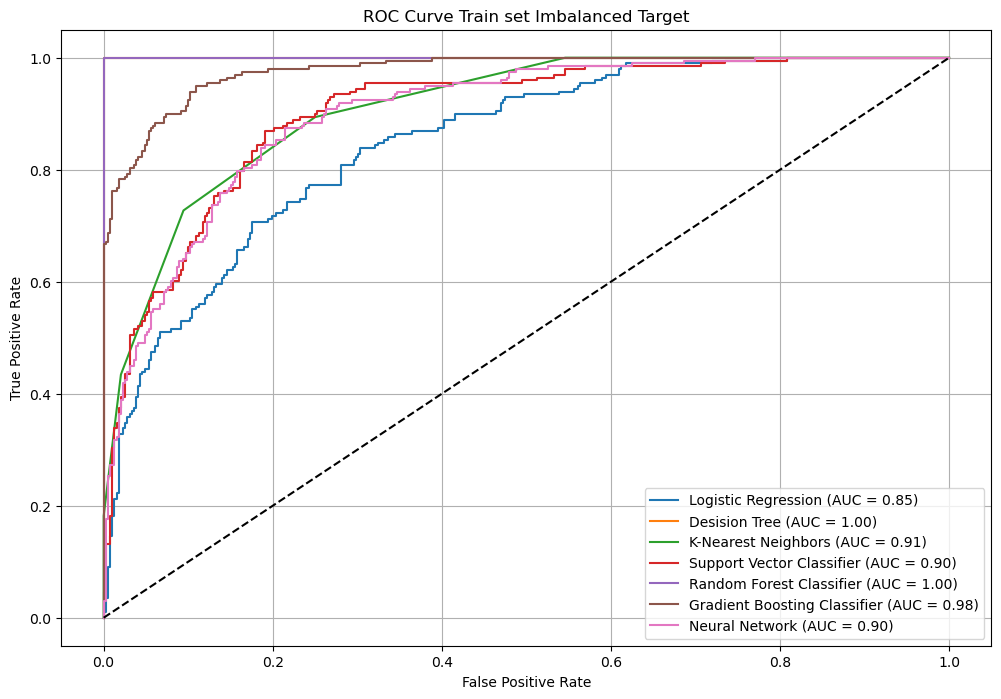

In [320]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_train)

    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_prob = model.predict_proba(X_train)[:, 1]
    else:
        y_prob = model.decision_function(X_train)
        # Convert decision function output to probabilities
        y_prob = 1 / (1 + np.exp(-y_prob))

    fpr, tpr, thresholds = roc_curve(y_train, y_prob)
    auc_score = roc_auc_score(y_train, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train set Imbalanced Target')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Evaluate on Test Set - Imbalanced Target

In [321]:
results_on_test_set_imbalanced = {}
for model_name, model in models.items():

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results_on_test_set_imbalanced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }


c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Confusion Matrix

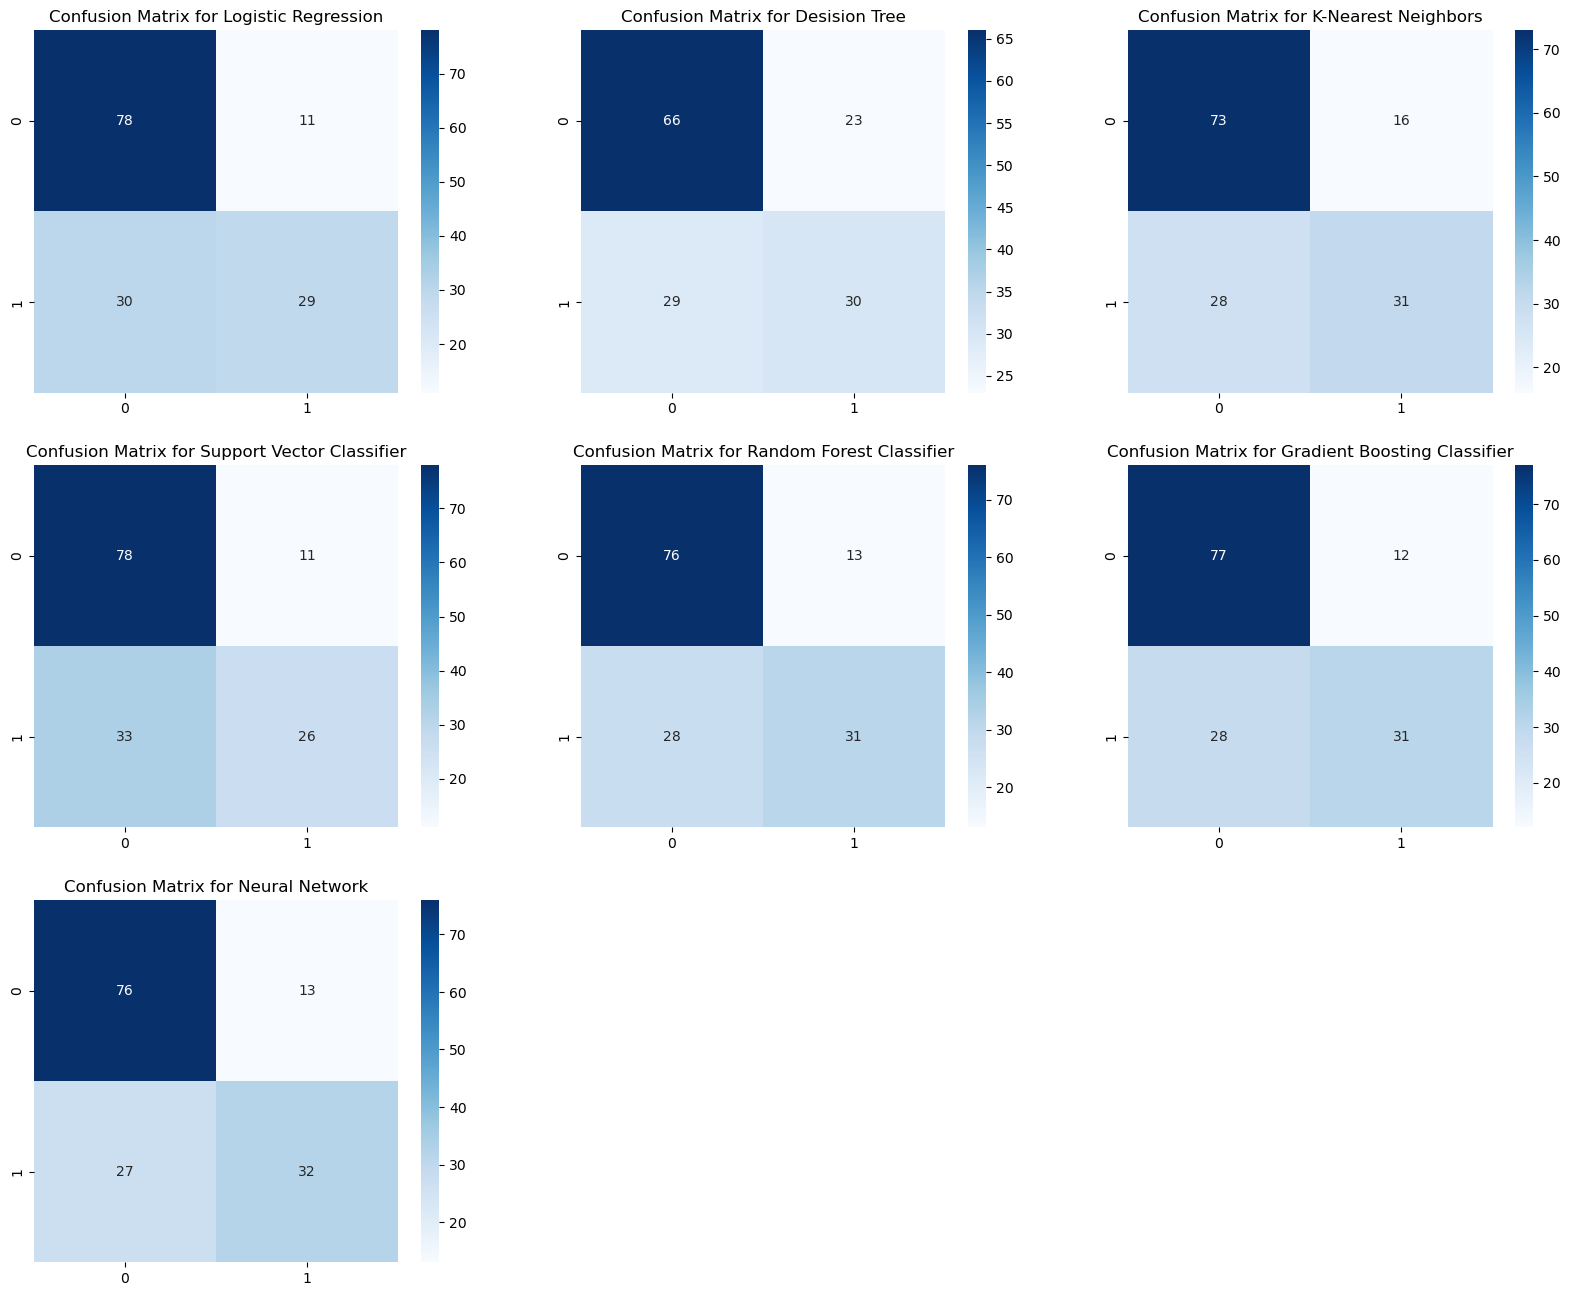

In [322]:
plt.figure(figsize=(20,16))
i=0
for model_name, metrics in results_on_test_set_imbalanced.items():
    plt.subplot(3,3,i+1)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    i+=1

In [323]:
class_info = pd.DataFrame(results_on_test_set_imbalanced)
class_info = class_info.drop('Confusion Matrix')

##### Classification Information 

In [324]:
class_info.T

,Accuracy,Precision,Recall
Logistic Regression,0.722973,0.725,0.491525
Desision Tree,0.648649,0.566038,0.508475
K-Nearest Neighbors,0.702703,0.659574,0.525424
Support Vector Classifier,0.702703,0.702703,0.440678
Random Forest Classifier,0.722973,0.704545,0.525424
Gradient Boosting Classifier,0.72973,0.72093,0.525424
Neural Network,0.72973,0.711111,0.542373


##### ROC_AUC

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


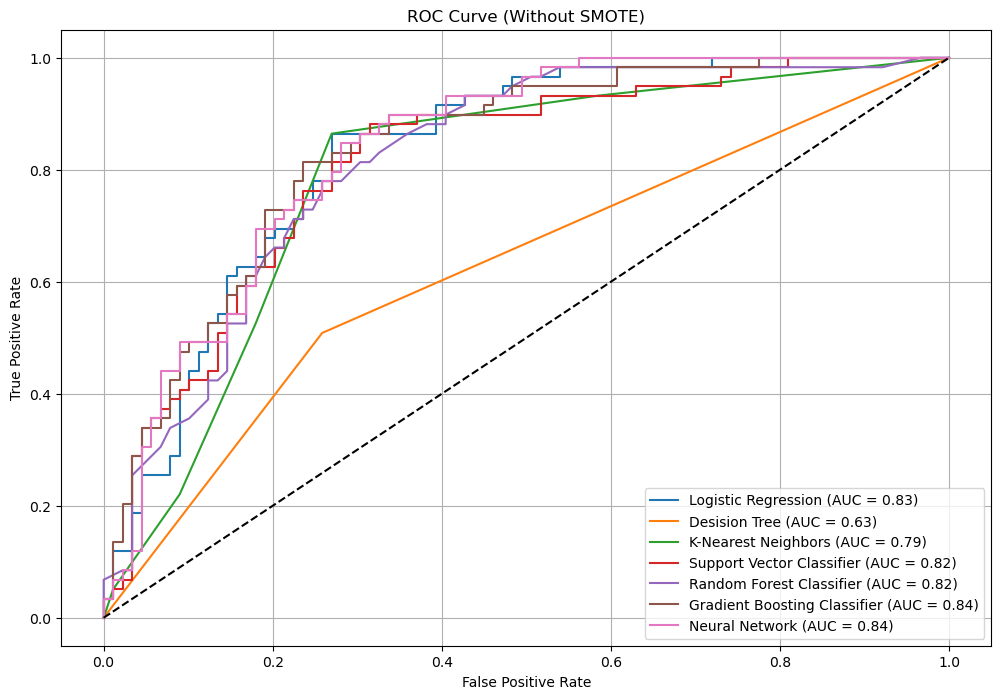

In [325]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
        # Convert decision function output to probabilities
        y_prob = 1 / (1 + np.exp(-y_prob))

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Without SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Cross Validation 

In [348]:
cross_val_result_imbalanced= {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    #cv_scores = cross_val_score(model, X, y, cv=5, scoring='recall')

    scores = cross_val_score(model, X, y, cv=5, scoring='recall')

    cross_val_result_imbalanced[model_name] = {
        'mean_score' : scores.mean(),
        'std_score' : scores.std()
    }

    #cross_val_result_imbalanced[model_name] = cv_scores.mean()

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [350]:
cross_val_result_imbalanced = pd.DataFrame(cross_val_result_imbalanced)

In [352]:
cross_val_result_imbalanced.T

,mean_score,std_score
Logistic Regression,0.572021,0.026799
Desision Tree,0.544646,0.078165
K-Nearest Neighbors,0.599020,0.033961
Support Vector Classifier,0.568024,0.032043
Random Forest Classifier,0.587330,0.073757
Gradient Boosting Classifier,0.602790,0.049277
Neural Network,0.614555,0.061246


# D. Modeling Balanced Class

## Train and Evaluate Model - Balanced Target

In [328]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [329]:
results_on_train_set_balanced = {}
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    # Make predictions
    y_pred = model.predict(X_train_balanced)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train_balanced, y_pred)
    precision = precision_score(y_train_balanced, y_pred)
    recall = recall_score(y_train_balanced, y_pred)
    conf_matrix = confusion_matrix(y_train_balanced, y_pred)
    
    # Store results
    results_on_train_set_balanced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix

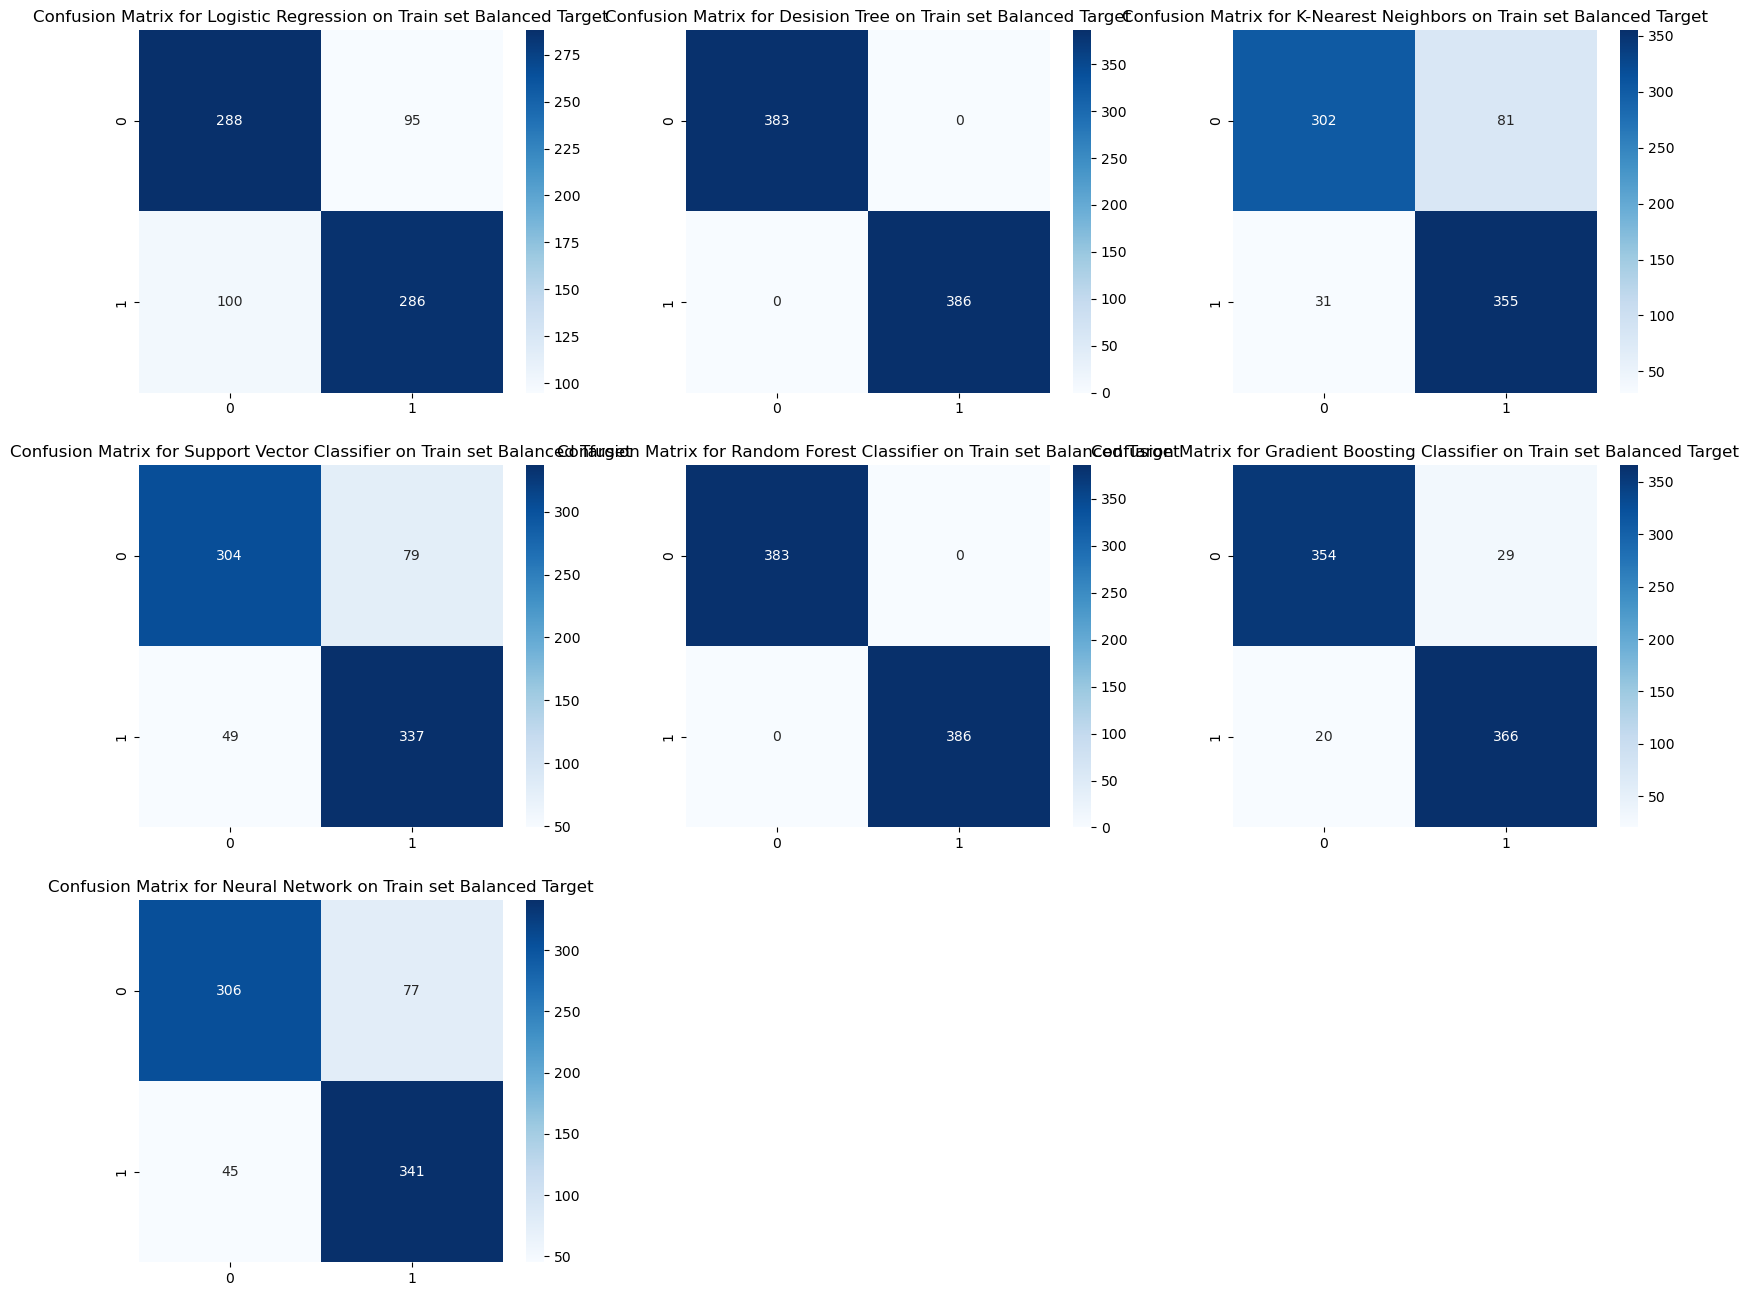

In [330]:
plt.figure(figsize=(20,16))
i=0
for model_name, metrics in results_on_train_set_balanced.items():
    plt.subplot(3,3,i+1)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name} on Train set Balanced Target')
    i+=1

### Classification Information

In [331]:
class_info_train_balanced = pd.DataFrame(results_on_train_set_balanced)
class_info_train_balanced = class_info_train_balanced.drop('Confusion Matrix')

In [332]:
class_info_train_balanced.T

,Accuracy,Precision,Recall
Logistic Regression,0.746424,0.750656,0.740933
Desision Tree,1.0,1.0,1.0
K-Nearest Neighbors,0.854356,0.81422,0.919689
Support Vector Classifier,0.83355,0.810096,0.873057
Random Forest Classifier,1.0,1.0,1.0
Gradient Boosting Classifier,0.936281,0.926582,0.948187
Neural Network,0.841352,0.815789,0.88342


### ROC_AUC

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


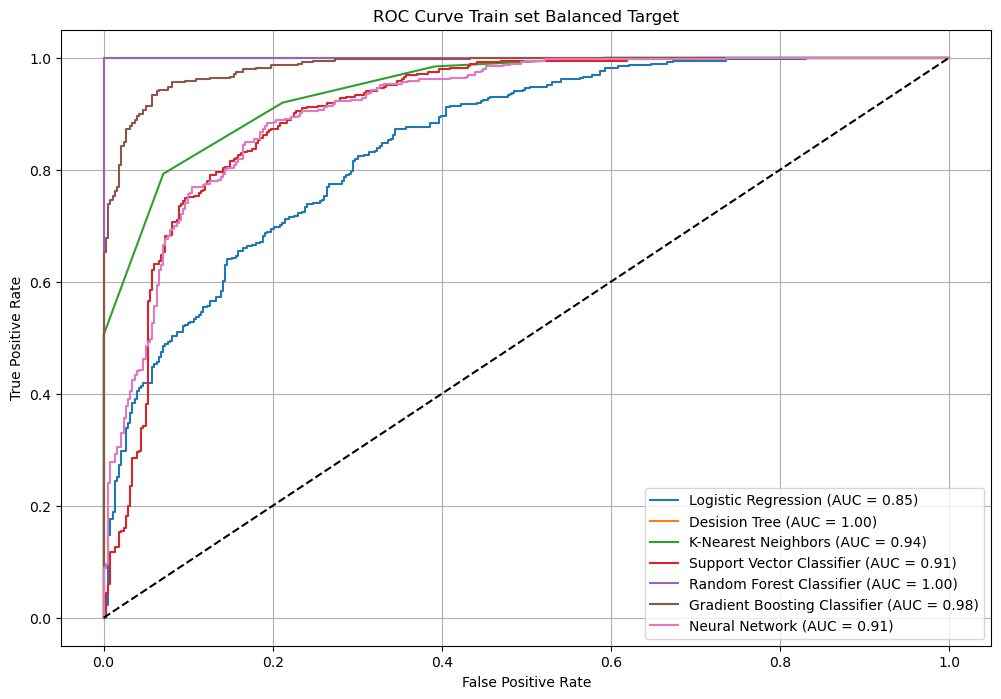

In [333]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    #model.fit(X_train_balanced, y_train_balanced)
    # Make predictions
    y_pred = model.predict(X_train_balanced)

    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_prob = model.predict_proba(X_train_balanced)[:, 1]
    else:
        y_prob = model.decision_function(X_train_balanced)
        # Convert decision function output to probabilities
        y_prob = 1 / (1 + np.exp(-y_prob))

    fpr, tpr, thresholds = roc_curve(y_train_balanced, y_prob)
    auc_score = roc_auc_score(y_train_balanced, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train set Balanced Target')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Evaluate On Test Set (Balanced Target)

In [334]:
results_on_test_set_balanced = {}
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    # Make predictions
    y_pred_balanced = model.predict(X_test_balanced)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_balanced, y_pred_balanced)
    precision = precision_score(y_test_balanced, y_pred_balanced)
    recall = recall_score(y_test_balanced, y_pred_balanced)
    conf_matrix = confusion_matrix(y_test_balanced, y_pred_balanced)
    
    # Store results
    results_on_test_set_balanced[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }
    

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix

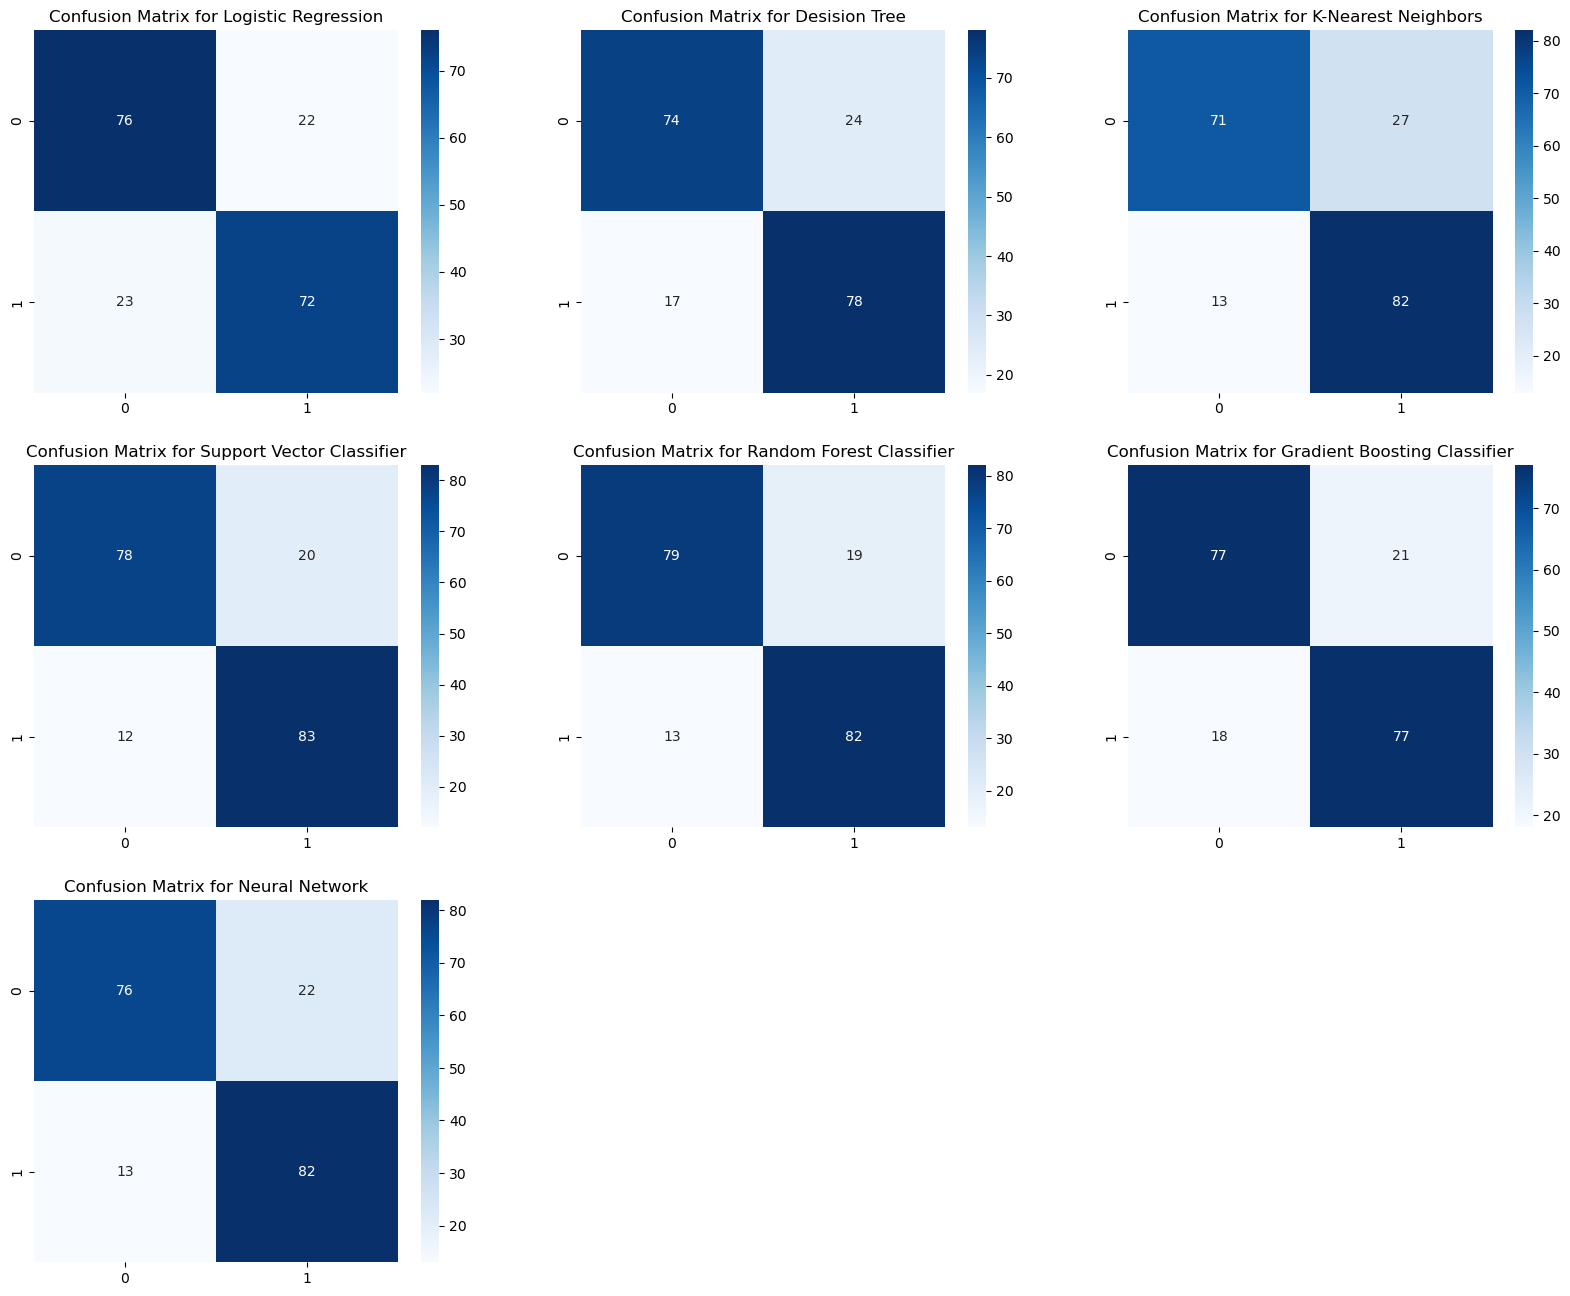

In [335]:
plt.figure(figsize=(20,16))
i=0
for model_name, metrics in results_on_test_set_balanced.items():
    plt.subplot(3,3,i+1)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    i+=1

### Classification Information

In [336]:
class_info = pd.DataFrame(results_on_test_set_balanced)
class_info = class_info.drop('Confusion Matrix')

In [337]:
class_info.T

,Accuracy,Precision,Recall
Logistic Regression,0.766839,0.765957,0.757895
Desision Tree,0.787565,0.764706,0.821053
K-Nearest Neighbors,0.792746,0.752294,0.863158
Support Vector Classifier,0.834197,0.805825,0.873684
Random Forest Classifier,0.834197,0.811881,0.863158
Gradient Boosting Classifier,0.797927,0.785714,0.810526
Neural Network,0.818653,0.788462,0.863158


### ROC AUC

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


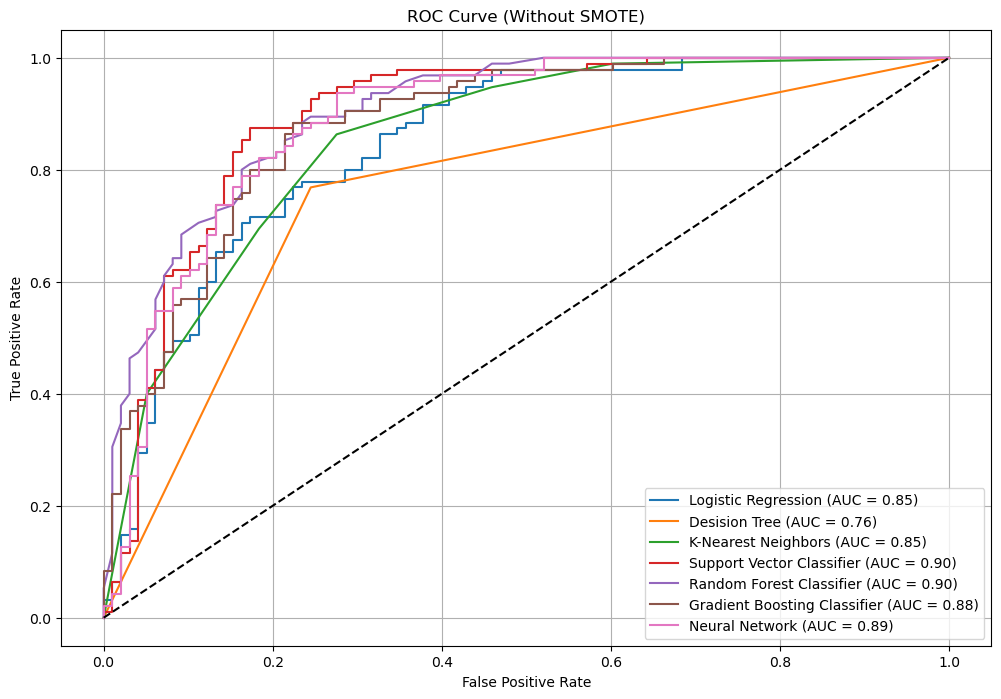

In [338]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    # Make predictions
    y_pred_balanced = model.predict(X_test_balanced)

    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        y_prob = model.predict_proba(X_test_balanced)[:, 1]
    else:
        y_prob = model.decision_function(X_test_balanced)
        # Convert decision function output to probabilities
        y_prob = 1 / (1 + np.exp(-y_prob))

    fpr, tpr, thresholds = roc_curve(y_test_balanced, y_prob)
    auc_score = roc_auc_score(y_test_balanced, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Without SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Cross Validation


In [358]:
cross_val_result_balanced= {}

for model_name, model in models.items():
    # Train the model
    #cv_scores = cross_val_score(model, X, y, cv=5, scoring='recall')

    scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='recall')

    cross_val_result_balanced[model_name] = {
        'mean_score' : scores.mean(),
        'std_score' : scores.std()
    }

c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\zuyyi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [360]:
cross_val_result_balanced = pd.DataFrame(cross_val_result_balanced)

In [361]:
cross_val_result_balanced.T

,mean_score,std_score
Logistic Regression,0.733913,0.031761
Desision Tree,0.796456,0.067452
K-Nearest Neighbors,0.889905,0.065195
Support Vector Classifier,0.852448,0.055481
Random Forest Classifier,0.837908,0.097037
Gradient Boosting Classifier,0.835782,0.073716
Neural Network,0.837822,0.054208
